In [99]:
# IMPORTING NECCESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

In [100]:
# LOADING THE DATASET
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [101]:
# DROPPING THE ID ROW SINCE IT IS NOT NECCESSARY FOR OUR ANALYSIS
df.drop("id",axis=1,inplace=True)

In [102]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [103]:
df.shape

(5110, 11)

We have 5110 rows and 11 columns

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [105]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [106]:
# WE'LL FILL THE NULL VALUES IN BMI (BODY MASS INDEX) COLUMN WITH THE MEAN
df["bmi"].fillna(df["bmi"].mean(),inplace=True)

In [107]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [108]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


In [109]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [110]:
df.duplicated().sum()

0

In [111]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Univariate Analysis

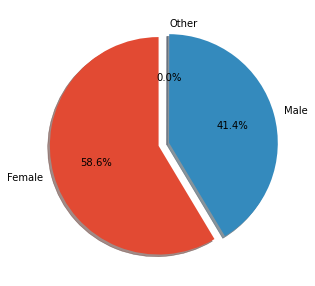

In [112]:
s = df["gender"].value_counts().reset_index().values
plt.figure(figsize=[8,5])
plt.style.use("ggplot")
explode = [0.1,0,0]
plt.pie(s[:,1],labels=s[:,0],explode=explode,shadow=True,startangle=90,autopct="%1.1f%%")  
plt.show()

Females have the highest population as a patient by taking approximately 59% of the population

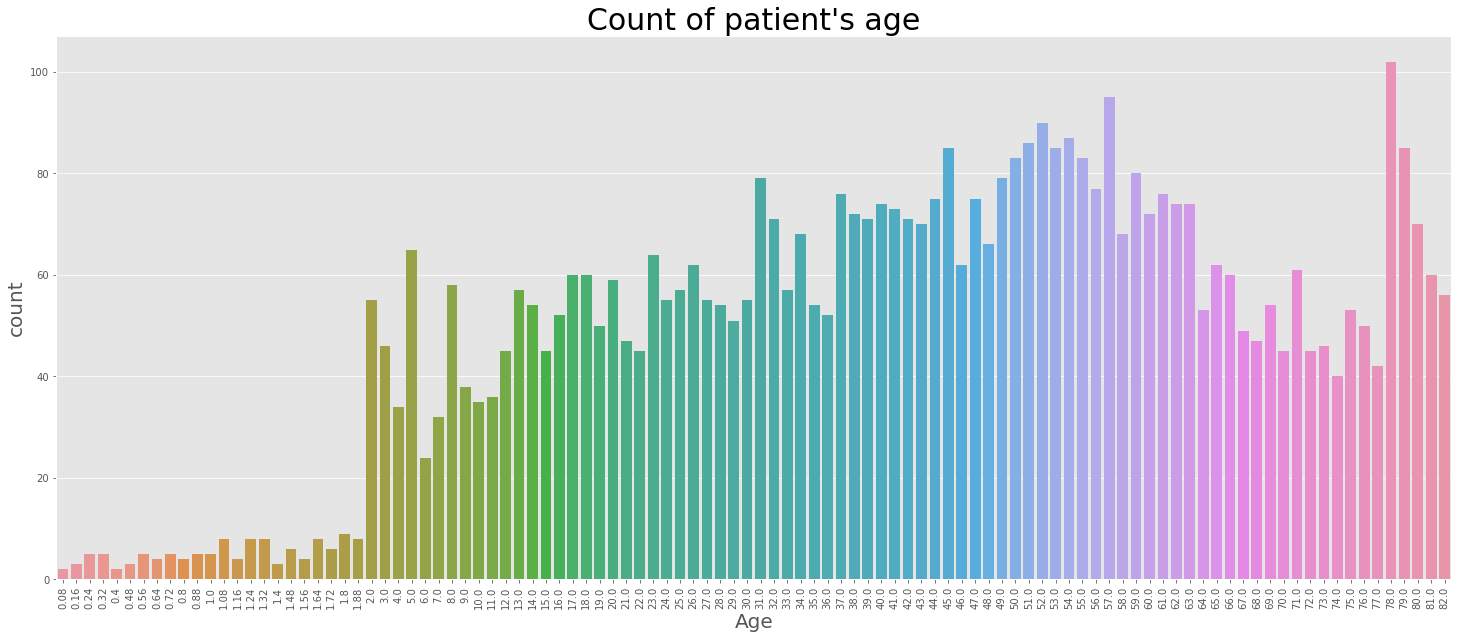

In [113]:
plt.figure(figsize=[25,10])
plt.style.use("ggplot")
sns.countplot(x=df["age"])
plt.title("Count of patient's age",fontsize=30)
plt.xticks(rotation="vertical",size=10)
plt.xlabel("Age",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Clearly and Obviously, patient with age 78 have the highest population....
Also more of the patient are of the older age

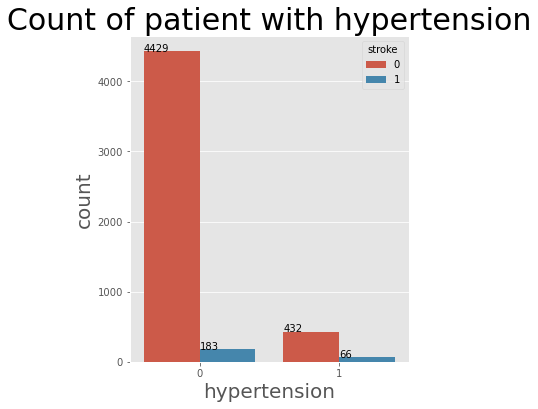

In [114]:
plt.figure(figsize=[5,6])
plt.style.use("ggplot")
ax = sns.countplot(x=df["hypertension"],hue="stroke",data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1,p.get_height()*1))


plt.title("Count of patient with hypertension",fontsize=30)
plt.xlabel("hypertension",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Majority of the patient does not have hypertension.
those with hypertension are below 500 while without hypertension are well above 4000

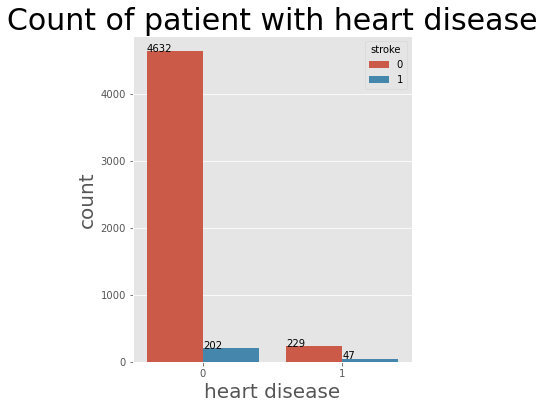

In [115]:
plt.figure(figsize=[5,6])
plt.style.use("ggplot")
ax = sns.countplot(x=df["heart_disease"],hue="stroke",data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1,p.get_height()*1))

plt.title("Count of patient with heart disease",fontsize=30)
plt.xlabel("heart disease",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Most of the patient are without heart disease 
Only 276 patients out of 5000 patients are with a form of heart disease

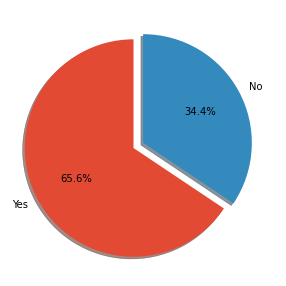

In [116]:
p = df["ever_married"].value_counts().reset_index().values
plt.figure(figsize=[6,5])
plt.style.use("ggplot")
explode = [0.1,0]
plt.pie(p[:,1],labels=p[:,0],explode=explode,shadow=True,startangle=90,autopct="%1.1f%%")  
plt.show()

Most of the patient have been married

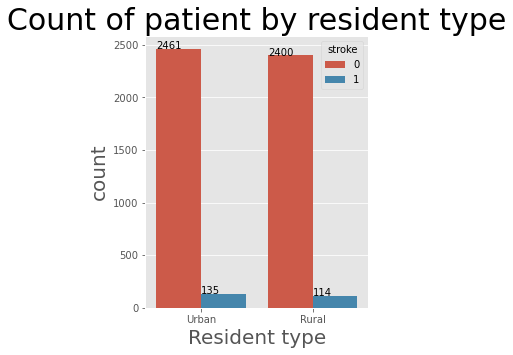

In [117]:
plt.figure(figsize=[4,5])
plt.style.use("ggplot")
ax = sns.countplot(x=df["Residence_type"],hue="stroke",data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1,p.get_height()*1))

plt.title("Count of patient by resident type",fontsize=30)
plt.xlabel("Resident type",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Both Urban and Rural have almost equal number of patient

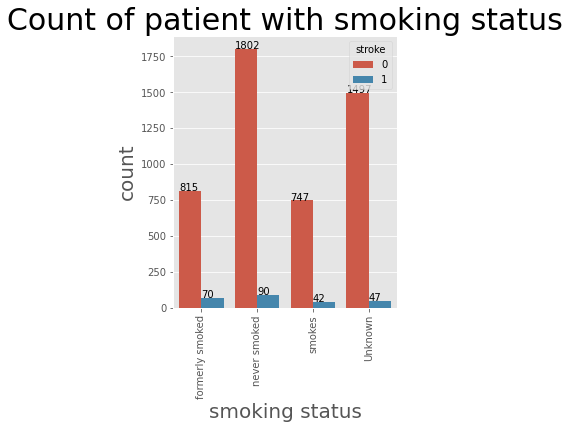

In [118]:
plt.figure(figsize=[4,5])
plt.style.use("ggplot")
ax = sns.countplot(x=df["smoking_status"],hue="stroke",data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1,p.get_height()*1))

plt.xticks(rotation="vertical")    
plt.title("Count of patient with smoking status",fontsize=30)
plt.xlabel("smoking status",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Most of the patients have never smoked

<Figure size 1440x720 with 0 Axes>

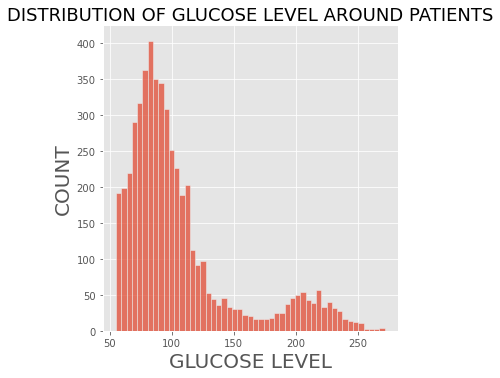

In [119]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(df["avg_glucose_level"])
plt.title("DISTRIBUTION OF GLUCOSE LEVEL AROUND PATIENTS",fontsize=18)
plt.xlabel("GLUCOSE LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Most of the patient's average glucose level is concentrated between 70 to 100

<Figure size 1440x720 with 0 Axes>

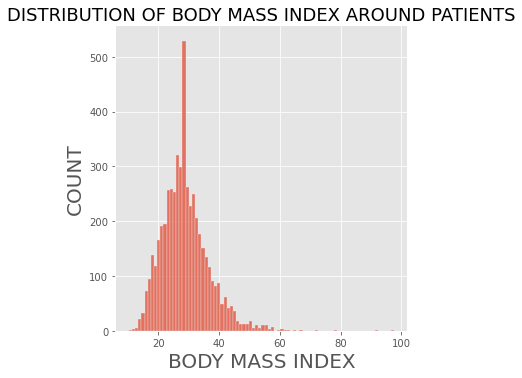

In [120]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(df["bmi"])
plt.title("DISTRIBUTION OF BODY MASS INDEX AROUND PATIENTS",fontsize=18)
plt.xlabel("BODY MASS INDEX",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

body mass index of patient is concntrated between 20 and 40

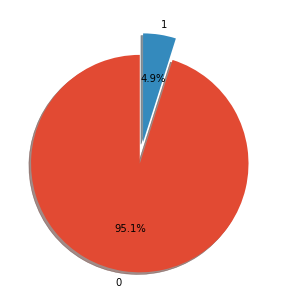

In [121]:
p = df["stroke"].value_counts().reset_index().values
plt.figure(figsize=[6,5])
plt.style.use("ggplot")
explode = [0.2,0]
plt.pie(p[:,1],labels=p[:,0],explode=explode,shadow=True,startangle=90,autopct="%1.1f%%")  
plt.show()

only 5% of the patient have stroke

## BI VARIATE ANALYSIS

In [122]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


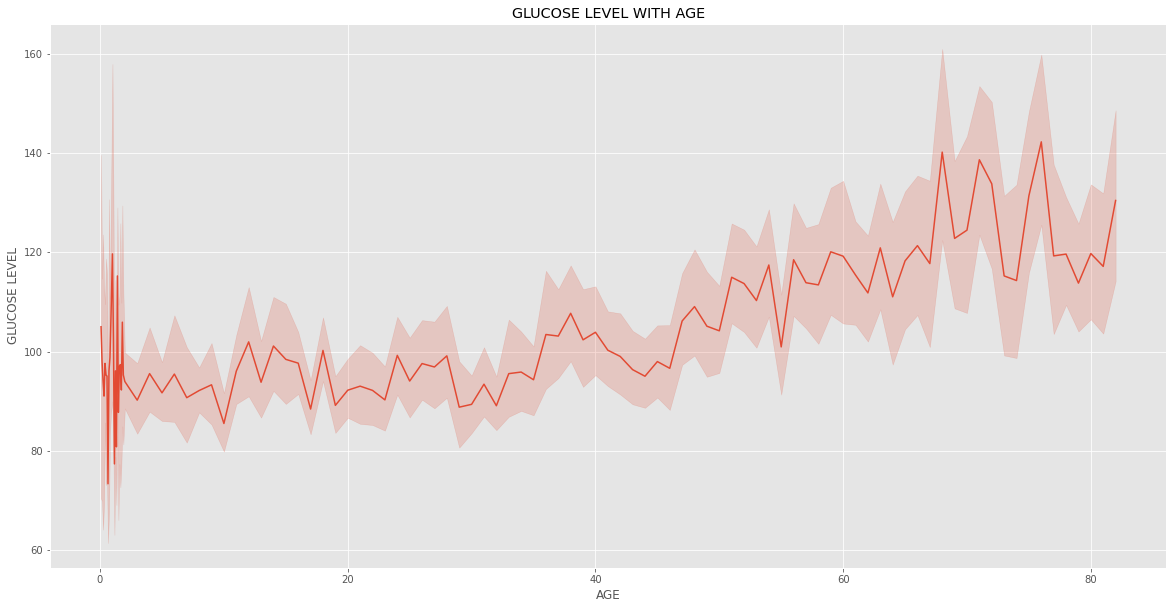

In [123]:
plt.figure(figsize=[20,10])
plt.style.use("ggplot")
sns.lineplot(x="age",y="avg_glucose_level",data=df)
plt.title("GLUCOSE LEVEL WITH AGE")
plt.xlabel("AGE")
plt.ylabel("GLUCOSE LEVEL")
plt.show()

The glucose level is increasing with age

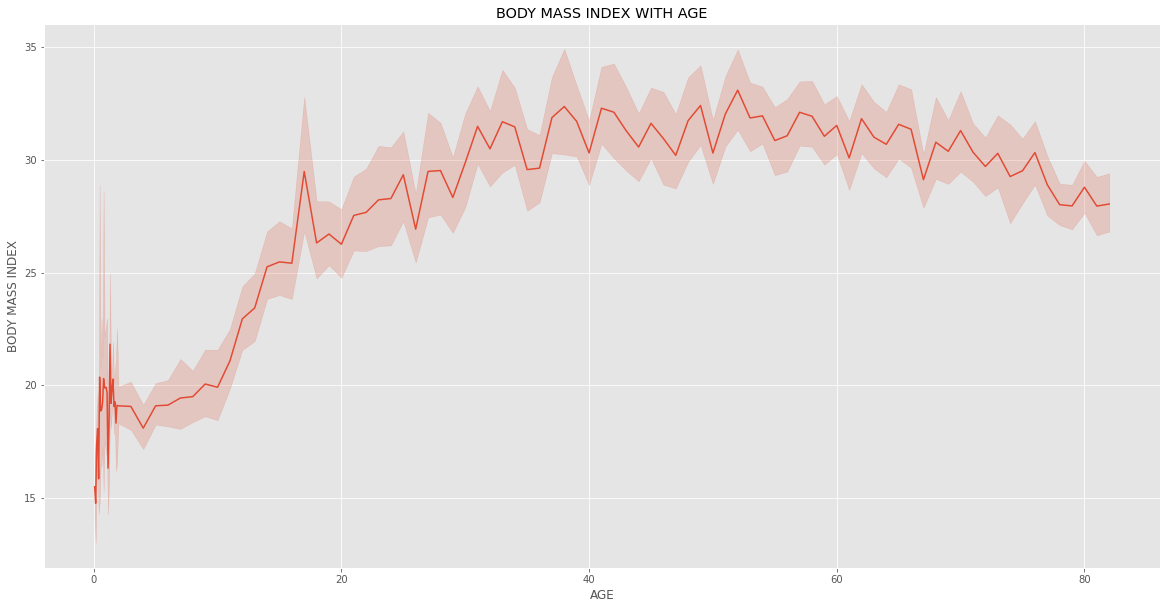

In [124]:
plt.figure(figsize=[20,10])
plt.style.use("ggplot")
sns.lineplot(x="age",y="bmi",data=df)
plt.title("BODY MASS INDEX WITH AGE")
plt.xlabel("AGE")
plt.ylabel("BODY MASS INDEX")
plt.show()

The body mass index of patient increases as the age increased up to 60...
after 60 years old age the body mass index starts to decrease

In [125]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


Text(0.5, 1.0, 'GENDER OF PATIENT WITH AND WITHOUT STROKE ')

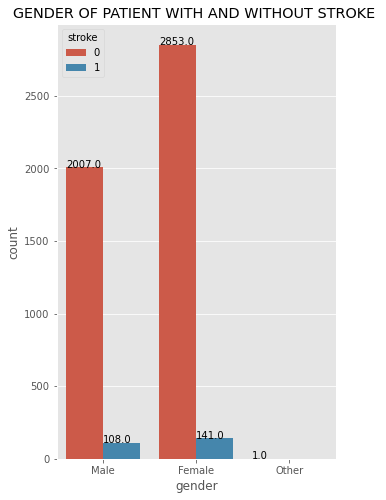

In [126]:
plt.figure(figsize=[5,8])
plt.style.use("ggplot")
ax = sns.countplot(x="gender",hue="stroke",data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1,p.get_height()*1))

plt.title("GENDER OF PATIENT WITH AND WITHOUT STROKE ")

Since more patient are female, female had the most patient with stroke.....
with just 33 number of patient more

In [127]:
v = pd.crosstab(df["age"],df["stroke"]).reset_index()
v.columns = ["age","no stroke","yes stroke"]
v

,age,no stroke,yes stroke
0,0.08,2,0
1,0.16,3,0
2,0.24,5,0
3,0.32,5,0
4,0.40,2,0
...,...,...,...
99,78.00,81,21
100,79.00,68,17
101,80.00,53,17
102,81.00,46,14


In [128]:
px.line(v,v["age"],v["yes stroke"],title="PATIENT THAT HAVE STROKE WITH AGE")

More patient have stroke starting from age 40 above

In [129]:
v = pd.crosstab(df["bmi"],df["stroke"]).reset_index()
v.columns = ["bmi","no stroke","yes stroke"]
v

,bmi,no stroke,yes stroke
0,10.3,1,0
1,11.3,1,0
2,11.5,1,0
3,12.0,1,0
4,12.3,1,0
...,...,...,...
414,66.8,1,0
415,71.9,1,0
416,78.0,1,0
417,92.0,1,0


In [130]:
px.line(v,v["bmi"],v["yes stroke"],title="PATIENT THAT HAVE STROKE WITH THIER BODY MASS INDEX")

Patient with body mass between 25-32 have more tendency to have stroke

In [131]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [132]:
m = pd.crosstab(df["smoking_status"],df["stroke"]).reset_index()
m.columns = ["smoking_status","no stroke","yes stroke"]
m

,smoking_status,no stroke,yes stroke
0,Unknown,1497,47
1,formerly smoked,815,70
2,never smoked,1802,90
3,smokes,747,42


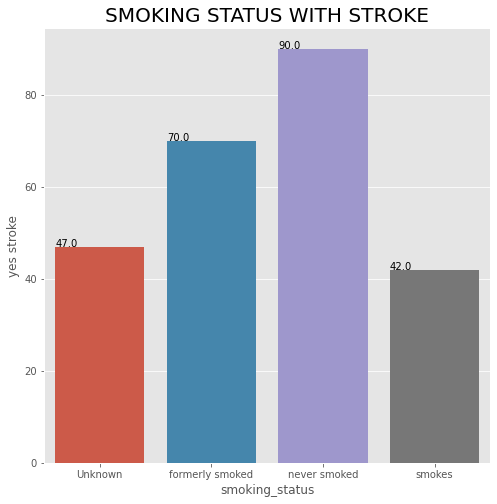

In [133]:
plt.figure(figsize=[8,8])
plt.style.use("ggplot")
ax = sns.barplot(x = m["smoking_status"],y = m["yes stroke"])

for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1,i.get_height()*1))
    
plt.title("SMOKING STATUS WITH STROKE",fontsize=20)
plt.show()


Patient who never smoked have the highest population followed by those who formerly smoked

In [134]:
c = pd.crosstab(df["work_type"],df["stroke"]).reset_index()
c.columns = ["work_type","no stroke","yes stroke"]
c

,work_type,no stroke,yes stroke
0,Govt_job,624,33
1,Never_worked,22,0
2,Private,2776,149
3,Self-employed,754,65
4,children,685,2


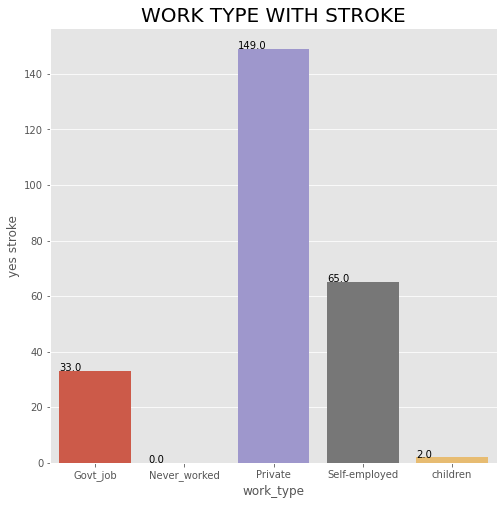

In [135]:
plt.figure(figsize=[8,8])
plt.style.use("ggplot")
ax = sns.barplot(x = c["work_type"],y = c["yes stroke"])

for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1,i.get_height()*1))
    
plt.title("WORK TYPE WITH STROKE",fontsize=20)
plt.show()


Patient who worked privately have the largest population with stroke

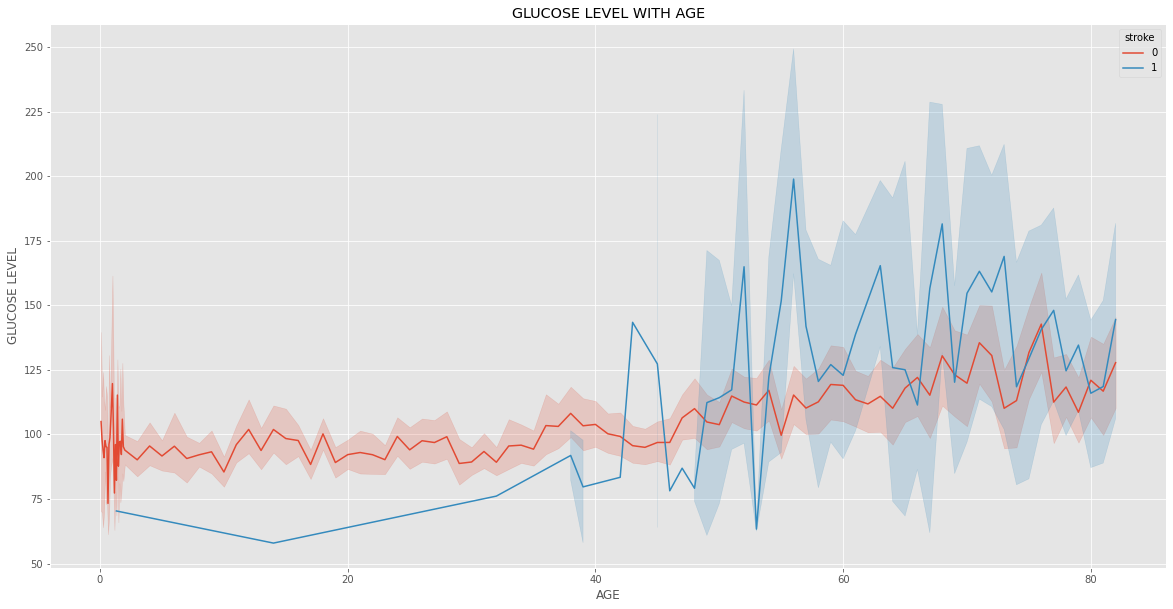

In [136]:
plt.figure(figsize=[20,10])
plt.style.use("ggplot")
sns.lineplot(x="age",y="avg_glucose_level",hue="stroke",data=df)
plt.title("GLUCOSE LEVEL WITH AGE")
plt.xlabel("AGE")
plt.ylabel("GLUCOSE LEVEL")
plt.show()

for patient with stroke, their glucose level increased significantly with age

## CONCLUSION

1. Female have the highest population as a patient in the hospital
2. Likewiwse more Female are likely to have stroke out of the patient
3. Most patient with stroke are 40 and above
4. The patient in the hospital are mostly adult
5. Having hypertension does not neccessarily leads to stroke
6. Also having heart diseases does not neccessarily leads to stroke
7. Married people are majority of the patient in the hospital
7. Place of residence (urban or rural) does not affect having or not having stroke
8. Glucose level of patients increases with age
9. Those with stroke are more likely to be working in Private organisation
10. Stroke start in patient starting from the age of 40 and above
11. Glucose level increase with age is more significant in patient with stroke

# PREDICTIVE ANALYSIS

In [137]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [138]:
df.shape

(5110, 11)

In [139]:
# WE REMOVE THE GENDER OTHER THAN MALE OR FEMALE
filt = df["gender"] == "Other"
new_df = df.loc[~filt]
new_df.shape

(5109, 11)

<AxesSubplot:>

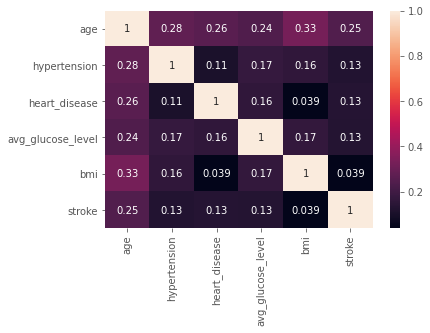

In [140]:
sns.heatmap(df.corr(),annot=True)

In [141]:
new_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [142]:
# WE WILL CONVERT ALL CATEGORICAL VARIABLE TO DUMMIES

In [143]:
new_df["gender"] = new_df["gender"].apply(lambda x: 1 if x=="Male" else 0)
new_df["ever_married"] = new_df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
new_df["Residence_type"] = new_df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [144]:
new_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1


In [145]:
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,10].values

In [146]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,0,0,1,0,0,1,0


In [147]:
x = x.values

In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [149]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [150]:
# using Naive Bayes Classifier

In [151]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(x_train,y_train)

GaussianNB()

In [152]:
y_pred1 = classifier1.predict(x_test)

In [153]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred1,y_test)
report = classification_report(y_pred1,y_test)
print(cm)
print(report)

[[145   2]
 [823  52]]
              precision    recall  f1-score   support

           0       0.15      0.99      0.26       147
           1       0.96      0.06      0.11       875

    accuracy                           0.19      1022
   macro avg       0.56      0.52      0.19      1022
weighted avg       0.85      0.19      0.13      1022



In [154]:
# using kernel SVM

In [155]:
from sklearn.svm import SVC
classifier2 = SVC(kernel="rbf",random_state=0)
classifier2.fit(x_train,y_train)

SVC(random_state=0)

In [156]:
y_pred2 = classifier2.predict(x_test)

In [157]:
cm = confusion_matrix(y_pred2,y_test)
report = classification_report(y_pred2,y_test)
print(cm)
print(report)

[[968  54]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [158]:
# Using Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(criterion="entropy",random_state=0)
classifier3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [160]:
y_pred3 = classifier3.predict(x_test)

In [161]:
cm = confusion_matrix(y_pred3,y_test)
report = classification_report(y_pred3,y_test)
print(cm)
print(report)

[[967  54]
 [  1   0]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1021
           1       0.00      0.00      0.00         1

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [162]:
# using logistic regression

In [163]:
from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression()
classifier4.fit(x_train,y_train)

LogisticRegression()

In [164]:
ypred4 = classifier4.predict(x_test)

In [165]:
cm = confusion_matrix(ypred4,y_test)
report = classification_report(ypred4,y_test)
print(cm)
print(report)

[[968  53]
 [  0   1]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1021
           1       0.02      1.00      0.04         1

    accuracy                           0.95      1022
   macro avg       0.51      0.97      0.50      1022
weighted avg       1.00      0.95      0.97      1022



In [166]:
# Naive Bayes is not suitable for the prediction